In [1]:
#import libraries

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Gaussian Filtering a 1-D Noisy Image

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = cv.imread('./images/stripe.png', cv.IMREAD_GRAYSCALE)
mean = 0
sigma = 0.05
noise = np.random.normal(mean,sigma,im.shape)
im = im.astype(np.float64)/255.0

im = cv.add(im, noise)*255
im = cv.normalize(im, None, 0, 255, cv.NORM_MINMAX)
im = im.astype(np.uint8)

f = im[150,:]
kernel = np.array([-1, 0, 1])
fx = cv.filter2D(f, cv.CV_32F, kernel)

g = cv.getGaussianKernel(11, 5., cv.CV_64F)
fgf = cv.filter2D(f, cv.CV_32F, g)
fgfx = cv.filter2D(fgf, cv.CV_32F, kernel)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', im)
cv.waitKey(0)
cv.destroyAllWindows()


fig, ax = plt.subplots(4, figsize=(10,16))
ax[0].plot(f)
ax[0].set_title('$f(x)$')
ax[1].plot(fx)
ax[1].set_title(r'$\frac{f}{dx}f(x)$')
ax[2].plot(fgf)
ax[2].set_title(r'$g(x) \ast f(x)$')
ax[3].plot(fgfx)
ax[2].set_title(r'$\frac{f}{dx}g(x) \ast f(x)$')
plt.subplots_adjust(bottom=0.1, top=0.9, hspace=0.5)
plt.show()

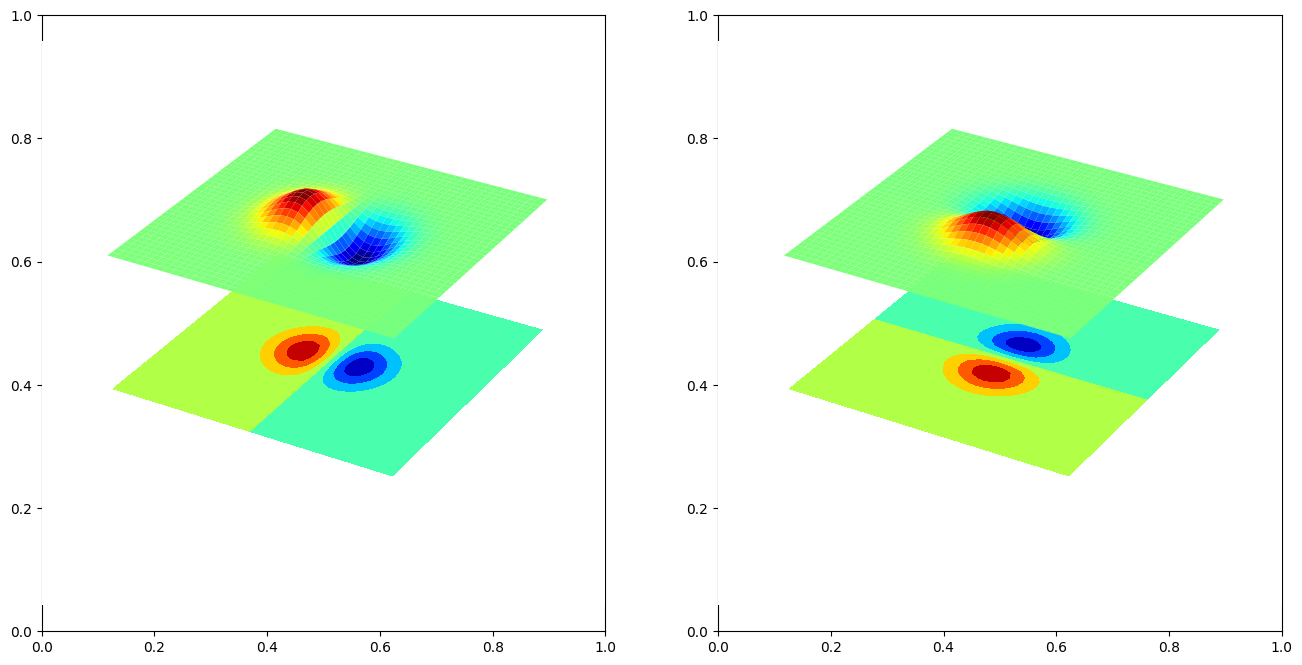

In [2]:
import cv2 as cv

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig, ax = plt.subplots(1,2, figsize=(16,8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
sigma = 1


X = np.arange(-5, 5.25, 0.25)
Y = np.arange(-5, 5.25, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + Y**2)/(2*sigma**2))

# kernel = np.array([-1., 0., 1.], dtype=np.float)
kernel = np.array([[0, 0, 0], [-1, 0., 1], [0, 0, 0]], dtype=np.float64)
Zx = cv.filter2D(Z, -1, kernel)
kernel = np.array([[0, -1., 0], [0, 0., 0], [0, 1., 0]], dtype=np.float64)
Zy = cv.filter2D(Z, -1, kernel)

# Plot the surface.
surf1 = ax1.plot_surface(X, Y, Zx, cmap=cm.jet, linewidth=0, antialiased=True)
surf2 = ax2.plot_surface(X, Y, Zy, cmap=cm.jet, linewidth=0, antialiased=True)


ax1.zaxis.set_major_locator(LinearLocator(10))
ax1.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

cset = ax1.contourf(X, Y, Zx, zdir='z', offset=np.min(Z) -1.5, cmap=cm.jet)
ax1.set_zlim(np.min(Zx) - 2, np.max(Zx))
cset = ax2.contourf(X, Y, Zy, zdir='z', offset=np.min(Z) -1.5, cmap=cm.jet)
ax2.set_zlim(np.min(Zy) - 2, np.max(Zx))

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
# Hide grid lines
# ax.grid(False)
ax1.axis('off')
ax2.axis('off')
# Hide axes ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])


plt.show()

## Image Gradients Using the Central Difference Formula

float32


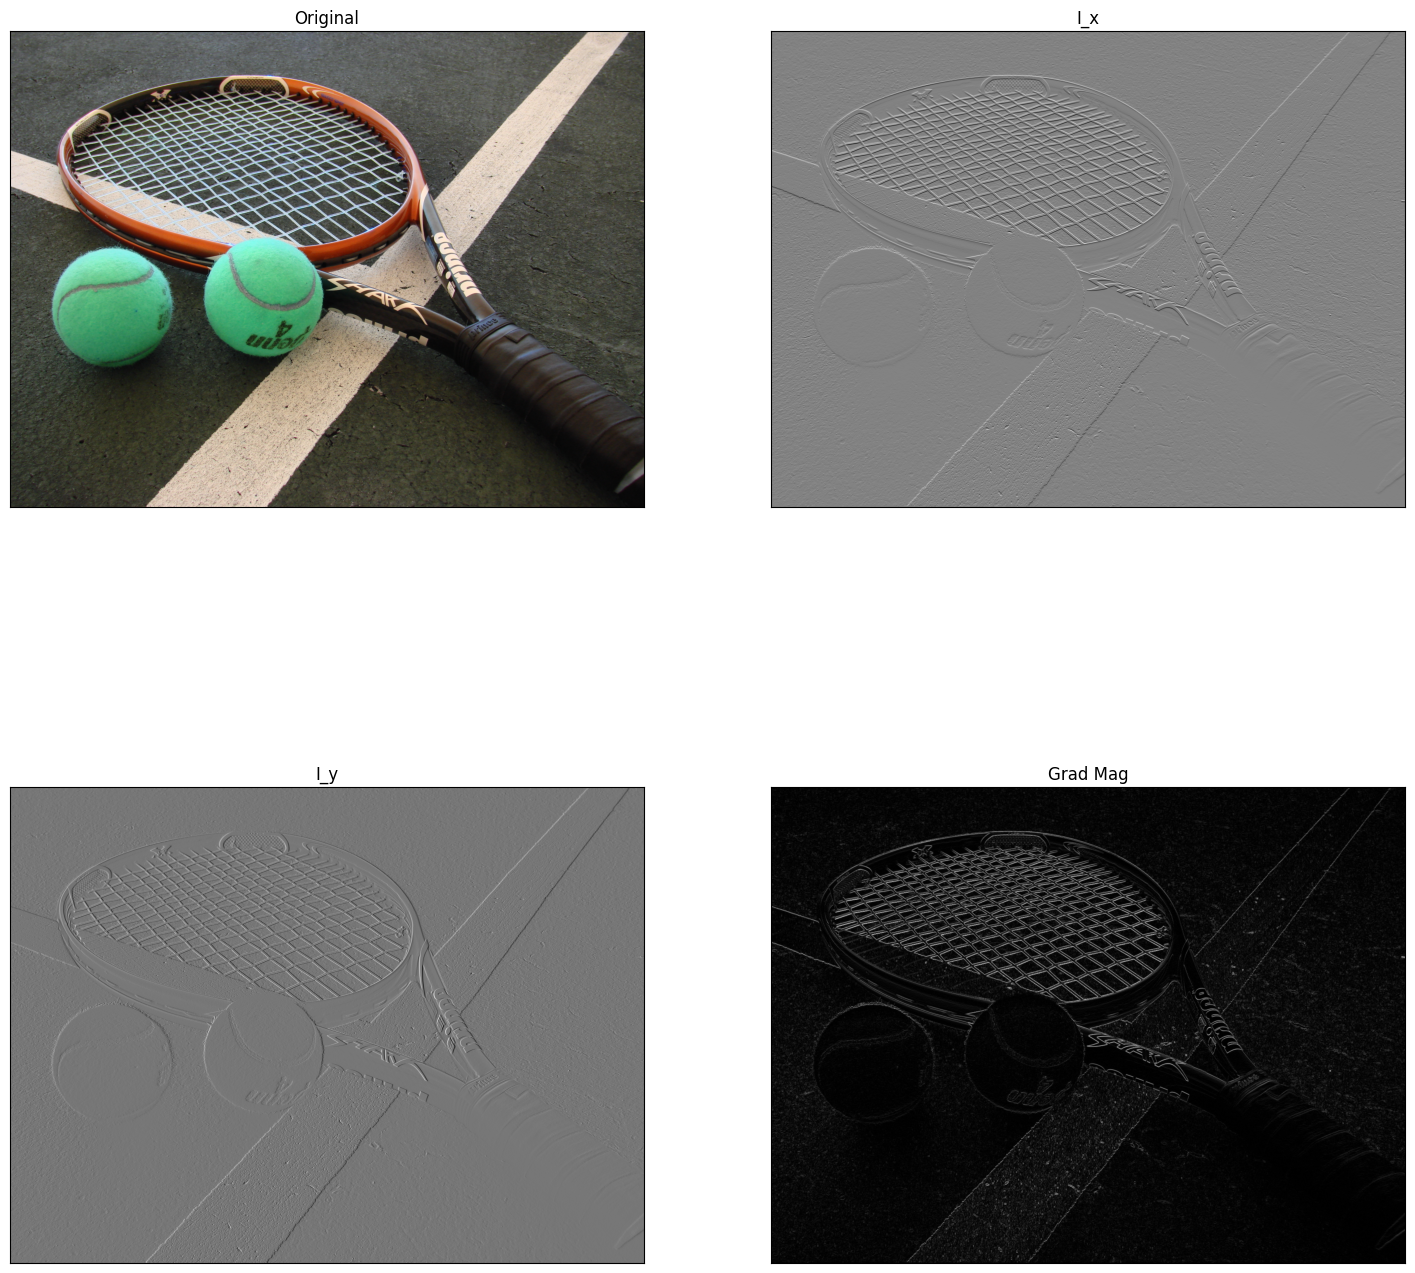

In [5]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('C:\Python\ipmv\Scripts\Image_Processing_NoteBooks\Images\Tennis_Racket_and_Balls.jpg', cv.IMREAD_REDUCED_COLOR_2)
I = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

kernel = np.array([[-1], [0], [1]])
Ix = cv.filter2D(I, cv.CV_32F, kernel)
print(Ix.dtype)

kernel = np.array([[-1, 0, 1]])
Iy = cv.filter2D(I, cv.CV_32F, kernel)

grad_mag = np.sqrt(Ix**2, Iy**2)
grad_mag = cv.normalize(grad_mag,  grad_mag, 0, 255, cv.NORM_MINMAX)

fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(18,18))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,1].imshow(Ix + 127, cmap='gray')
axes[0,1].set_title('I_x')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])
axes[1,0].imshow(Iy + 127, cmap='gray')
axes[1,0].set_title('I_y')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,1].imshow(grad_mag, cmap='gray')
axes[1,1].set_title('Grad Mag')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])
plt.show()

## Canny

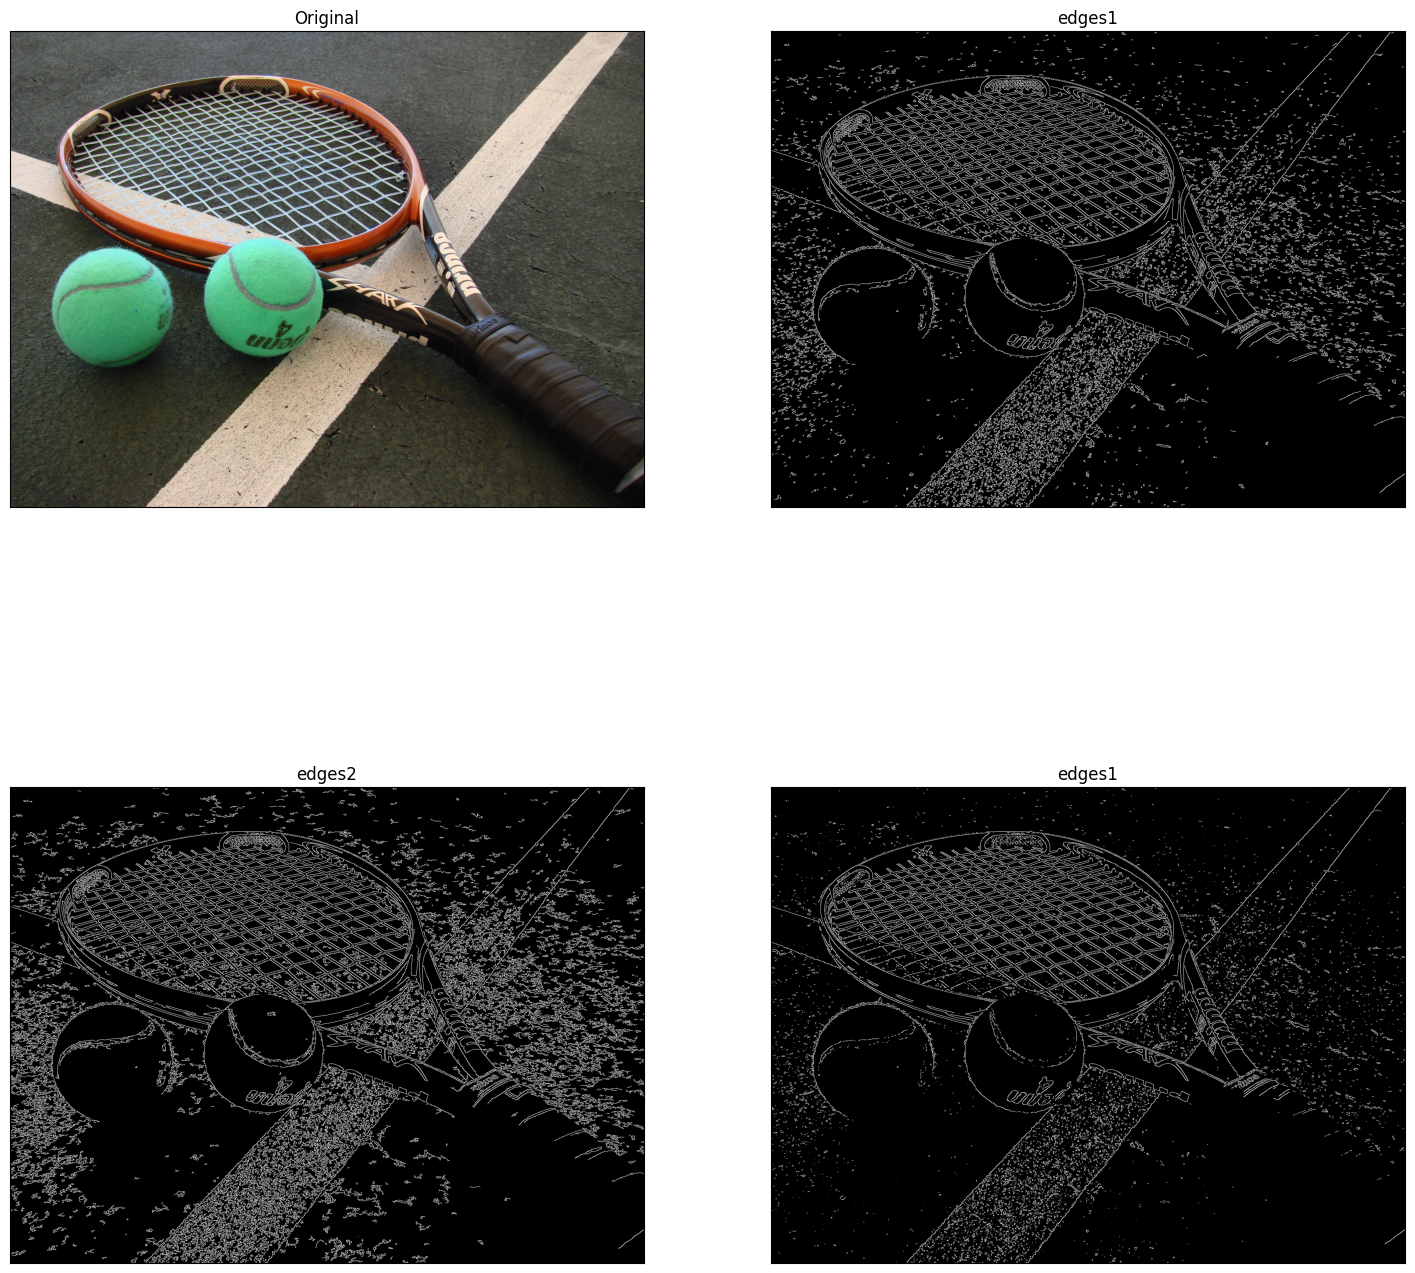

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('C:\Python\ipmv\Scripts\Image_Processing_NoteBooks\Images\Tennis_Racket_and_Balls.jpg', cv.IMREAD_REDUCED_COLOR_2)
I = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

edges1 = cv.Canny(img,100,200)
edges2 = cv.Canny(img,50,200)
edges3 = cv.Canny(img,175,200)

fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(18,18))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])

axes[0,1].imshow(edges1, cmap='gray')
axes[0,1].set_title('edges1')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])

axes[1,0].imshow(edges2, cmap='gray')
axes[1,0].set_title('edges2')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])

axes[1,1].imshow(edges3, cmap='gray')
axes[1,1].set_title('edges1')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])
plt.show()

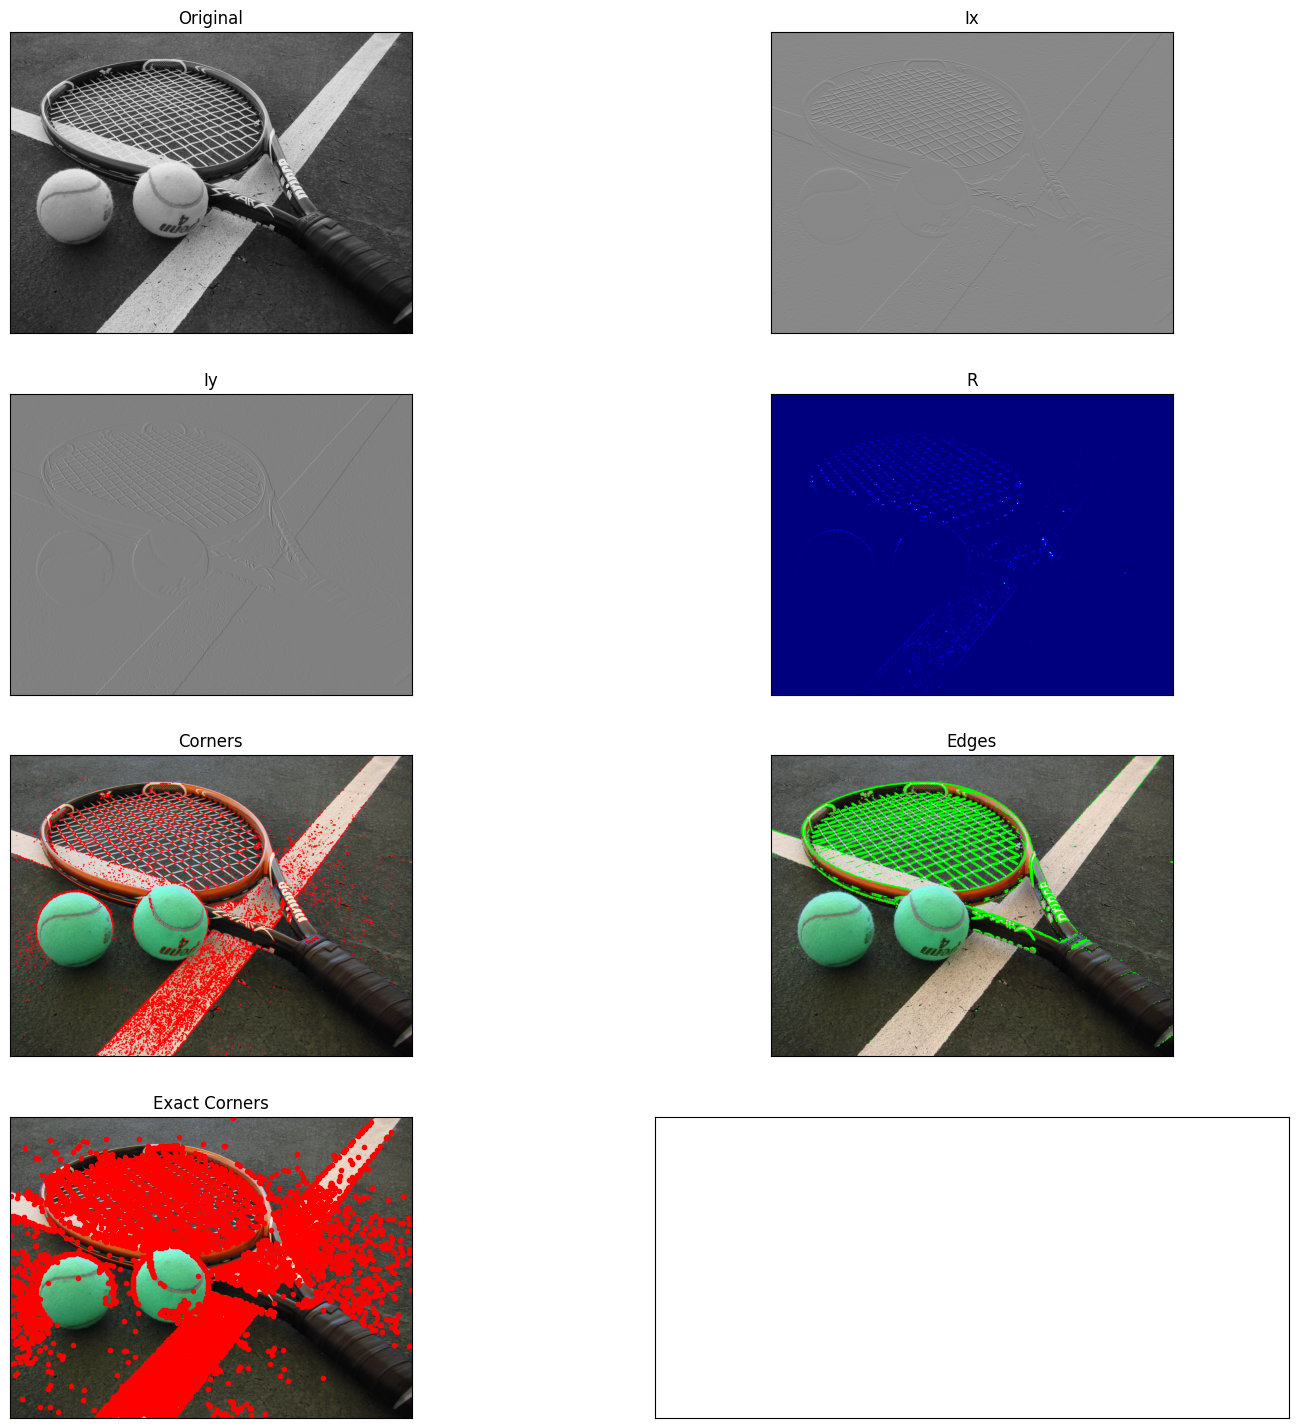

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import peak_local_max

im = cv.imread('C:\Python\ipmv\Scripts\Image_Processing_NoteBooks\Images\Tennis_Racket_and_Balls.jpg', cv.IMREAD_COLOR)
I = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

kernel = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
Ix = cv.filter2D(I, cv.CV_32F, kernel)
kernel = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float')
Iy = cv.filter2D(I, cv.CV_32F, kernel)

sigma = 3
ksize = 11
m11 = cv.GaussianBlur(Ix*Ix, (ksize, ksize), sigma)
m22 = cv.GaussianBlur(Iy*Iy, (ksize, ksize), sigma)
m12 = cv.GaussianBlur(Ix*Iy, (ksize, ksize), sigma)
m21 = m12

det = m11*m22 - m12*m21
trace = m11 + m22
alpha = 0.04
R = det - alpha*trace*trace

img_copy_for_corners = np.copy(im)
img_copy_for_edges = np.copy(im)
for rowindex, response in enumerate(R):
    for colindex, r in enumerate(response):
        if r > 1.E7:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]
            
R[R<1.E7] = 0
coordinates = peak_local_max(R, min_distance=2)
            
fig, axes  = plt.subplots(4,2, sharex='all', sharey='all', figsize=(18,18))
axes[0,0].imshow(I, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])

axes[0,1].imshow(Ix, cmap='gray')
axes[0,1].set_title('Ix')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])

axes[1,0].imshow(Iy, cmap='gray')
axes[1,0].set_title('Iy')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])

axes[1,1].imshow(R, cmap='jet')
axes[1,1].set_title('R')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])

axes[2,0].imshow(img_copy_for_corners, cmap='gray')
axes[2,0].set_title('Corners')
axes[2,0].set_xticks([]), axes[2,0].set_yticks([])

axes[2,1].imshow(img_copy_for_edges, cmap='gray')
axes[2,1].set_title('Edges')
axes[2,1].set_xticks([]), axes[2,1].set_yticks([])


axes[3,0].imshow(im, cmap='gray')
axes[3,0].set_title('Exact Corners')
axes[3,0].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
axes[3,0].set_xticks([]), axes[3,0].set_yticks([])

plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


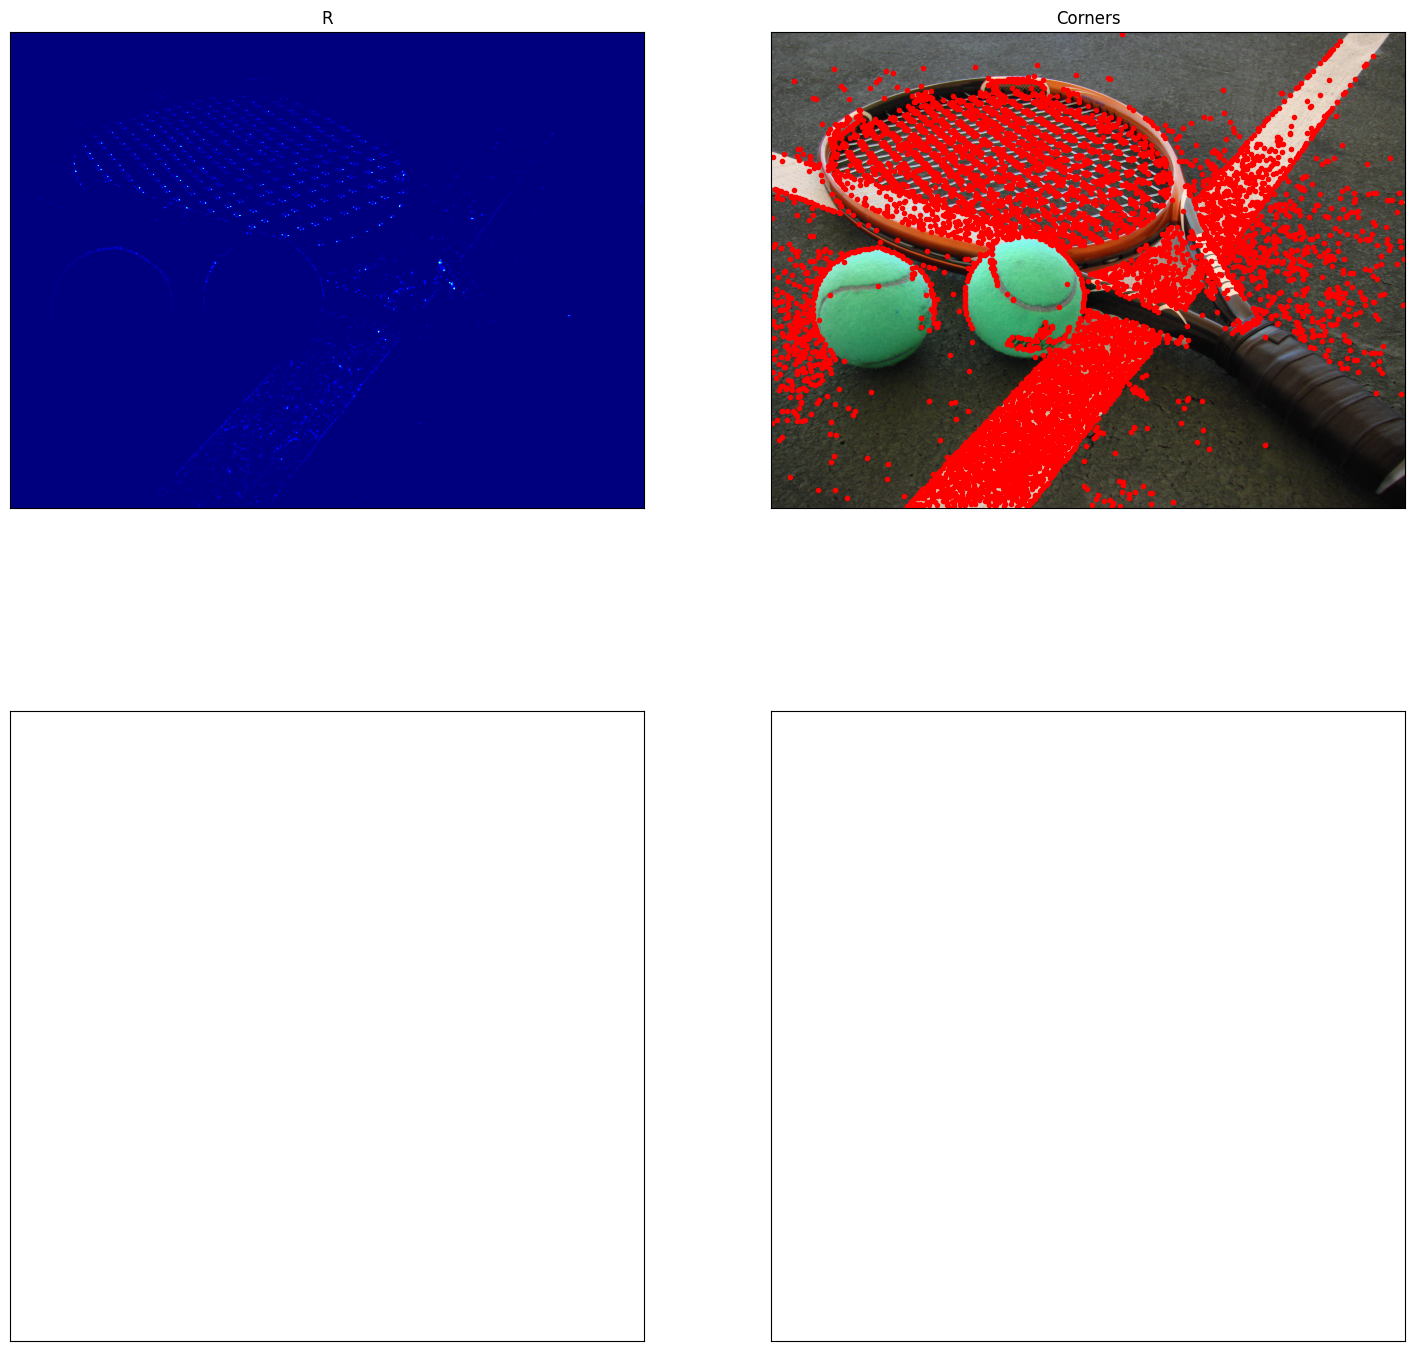

[[1116 2076]
 [ 754  627]
 [ 888 1111]
 ...
 [1986 2066]
 [1376 2578]
 [1566 1537]]


In [9]:
from skimage.feature import peak_local_max
print(R)

R[R<1.E7] = 0
coordinates = peak_local_max(R, min_distance=2)

fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(18,18))

axes[0,0].imshow(R, cmap='jet')
axes[0,0].set_title('R')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])

axes[0,1].imshow(im, cmap='gray')
axes[0,1].set_title('Corners')
axes[0,1].set_xticks([]), axes[0,0].set_yticks([])

axes[0,1].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
plt.show()
print(coordinates)

## Canny Edge Detector

In [1]:
# Canny edge detection
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

im = cv.imread('C:\Python\ipmv\Scripts\Image_Processing_NoteBooks\Images\emma.jpg', cv.IMREAD_COLOR)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', im)
cv.waitKey(0)

edges1 = cv.Canny(im,50,150)

cv.imshow('Image', edges1)
cv.waitKey(0)
cv.destroyAllWindows()

In [4]:
# Meaning of low-threshold and high-threshold
import cv2 as cv
import numpy as np
import math
hi_threshold_max = 255
title_window = r'Canny'

ratio = 0.3 # Low threshold/Hi threshold
hi_threshold = 255
low_threshold = math.floor(hi_threshold*ratio)

def on_trackbar(val):
    hi_threshold = cv.getTrackbarPos(trackbar1_name, title_window)
    ratio = cv.getTrackbarPos(trackbar2_name, title_window)/100.
    low_threshold = hi_threshold*ratio
    edges = cv.Canny(im,low_threshold,hi_threshold)
    cv.imshow(title_window, edges)

im = cv.imread('C:\Python\ipmv\Scripts\Image_Processing_NoteBooks\Images\emma.jpg', cv.IMREAD_COLOR)
if im is None:
    print('Could not open or find the image: ')
    exit(0)

cv.namedWindow(title_window)
trackbar1_name = r'High Threshold Value'
cv.createTrackbar(trackbar1_name, title_window , hi_threshold, hi_threshold_max, on_trackbar)
trackbar2_name = r'Low Threshold'
cv.createTrackbar(trackbar2_name, title_window , 1, 100, on_trackbar)
on_trackbar(hi_threshold)
cv.waitKey()
cv.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:866: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


In [3]:
# Hough circules for the coin image
import cv2 as cv
import numpy as np
im = cv.imread('C:\Python\ipmv\Scripts\Image_Processing_NoteBooks\Images\emma.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None
imc = cv.cvtColor(im,cv.COLOR_GRAY2BGR)
im = cv.medianBlur(im, 5)

circles = cv.HoughCircles(im, cv.HOUGH_GRADIENT, dp=2, minDist=50, param1=200, param2=100, minRadius=0, maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(imc,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(imc,(i[0],i[1]),2,(0,0,255),3)
cv.imshow('detected circles',imc)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('./images/graf/img1.ppm',cv.IMREAD_GRAYSCALE)   
img2 = cv.imread('./images/graf/img2.ppm',cv.IMREAD_GRAYSCALE) 
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.imshow(img3,),plt.show()

## Blobs

Item 1. Construct the scale-normalized Laplacian of Gaussian (LoG) with σ = 10. Choose the window size appropriately. Show this LoG as an image.

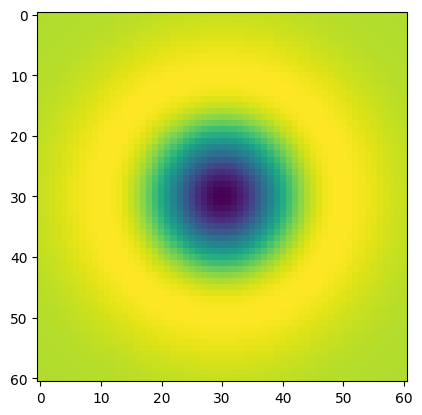

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
hw = 3*sigma
X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))

plt.imshow(log)

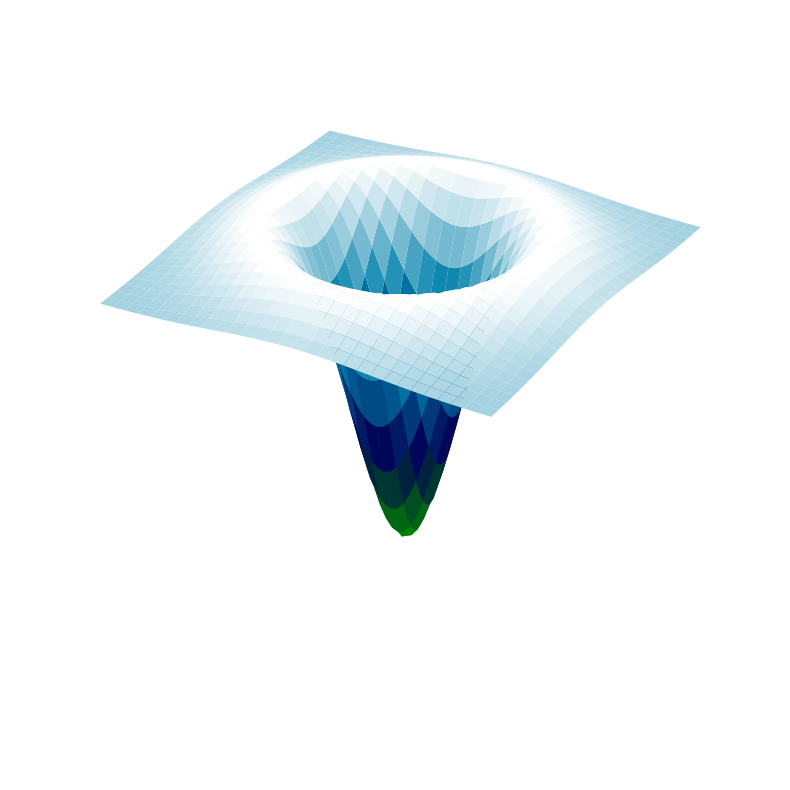

In [2]:
# This is not required
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, log, cmap=cm.ocean, linewidth = 0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.axis('off')
plt.show()

Item 2. Filter a 71×71 image of a black circle of radius r=14 with a series of LoG kernels with σ ∈ [5,15] and find the scale-space extremum. Justify your answer

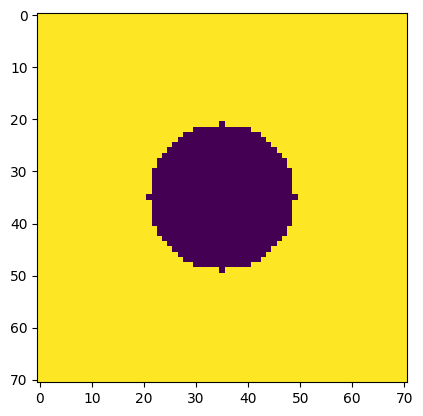

In [3]:
# Generating the circle
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

w, h = 71, 71
hw, hh = w//2, h//2
f = np.ones((h,w), dtype=np.float32)*255
X, Y = np.meshgrid(np.arange(-hh, hh + 1, 1), np.arange(-hw, hw + 1, 1))
r = w//5 # 14
f *= X**2 + Y**2 >  r**2
plt.imshow(f)

(35, 35, 5)
10


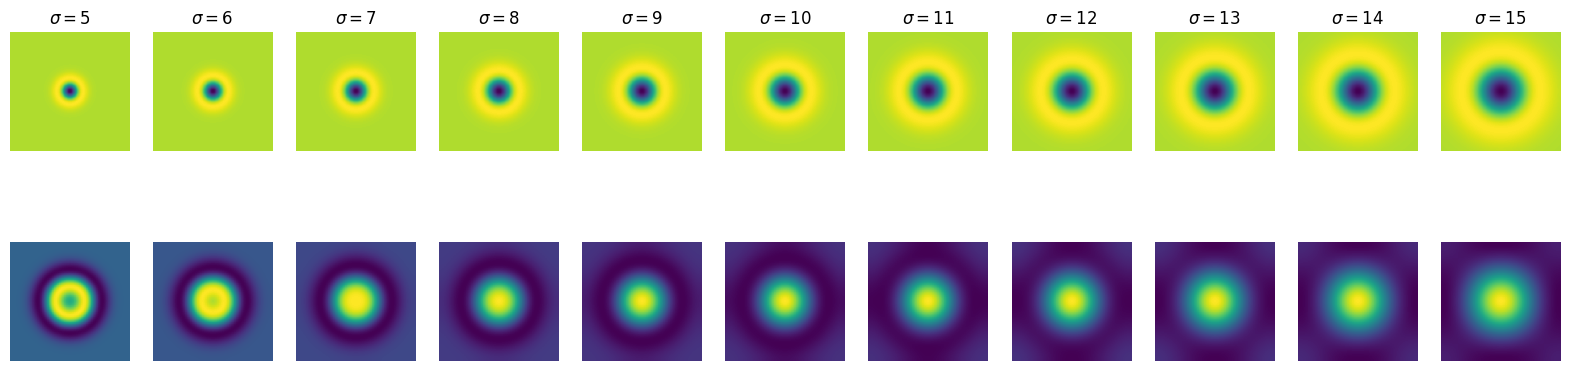

In [4]:
s = 11
fig, ax = plt.subplots(2, s, figsize=(20,5))
scale_space = np.empty((h, w, s), dtype=np.float32)
sigmas = np.arange(5, 16, 1)
for i, sigma in enumerate(sigmas):
    log_hw = 3*np.max(sigmas)
    X, Y = np.meshgrid(np.arange(-log_hw, log_hw + 1, 1), np.arange(-log_hw, log_hw + 1, 1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2) + Y**2/(sigma**2) - 2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f, -1, log)
    scale_space[:, :, i] = f_log
    ax[0, i].imshow(log)
    ax[0, i].axis('off')
    ax[0, i].set_title(r'$\sigma = {}$'.format(sigma))    
    ax[1, i].imshow(f_log)
    ax[1, i].axis('off')   

indices = np.unravel_index(np.argmax(scale_space, axis=None), scale_space.shape)
print(indices) # r = \sqrt{2}*sigma 
print(sigmas[indices[2]])